In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [5]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [6]:
y_pred=model.predict(X_test)

In [7]:
TP=np.sum((y_pred==1) & (y_test==1))
FP=np.sum((y_pred==1) & (y_test==0))
TN=np.sum((y_pred==0) & (y_test==0))
FN=np.sum((y_pred==0) & (y_test==1))
TP,FP,TN,FN

(87, 3, 51, 2)

<Axes: >

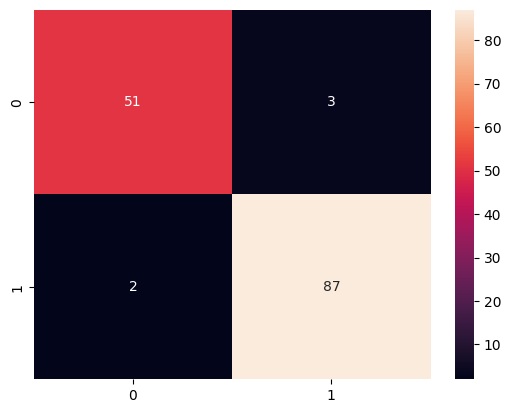

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [9]:
accuracy= (TP+TN)/(TP+FP+TN+FN)
accuracy,accuracy_score(y_test,y_pred)

(0.965034965034965, 0.965034965034965)

In [10]:
precison=TP/(TP+FP)
precison,precision_score(y_test,y_pred)

(0.9666666666666667, 0.9666666666666667)

In [11]:
recall=TP/(TP+FN)
recall,recall_score(y_test,y_pred)

(0.9775280898876404, 0.9775280898876404)

In [12]:
f1=2*precison*recall/(precison+recall)
f1,f1_score(y_test,y_pred)

(0.9720670391061451, 0.9720670391061452)

In [13]:
specificity=TN/(TN+FP)
specificity

0.9444444444444444

In [14]:
negative_prdective_value=TN/(TN+FN)
negative_prdective_value

0.9622641509433962

In [15]:
matthews_corrcoef(y_test,y_pred)

0.925445136208044

In [16]:
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_prob)

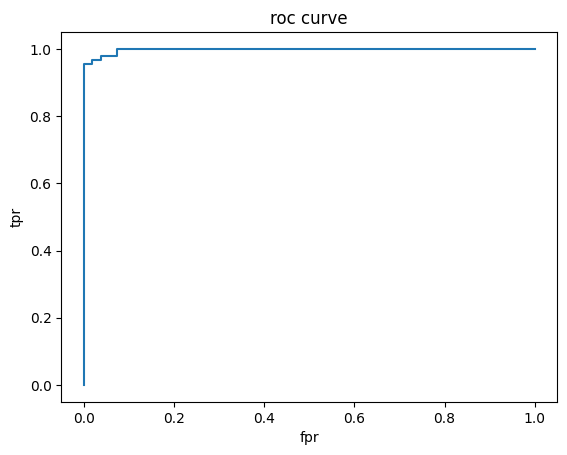

In [17]:
plt.plot(fpr,tpr)
plt.title('roc curve')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [18]:
auc=auc(fpr,tpr)
auc

0.9977111943404078